# Visualization of the simulation outputs

To understand the concrete impacts of a set of policy inputs on the transporation network, we have provided an utility called `visualization.py` (located in the `/utilities` folder) to **process** and **visualize the inputs and outputs of each BISTRO run**. <br> In this notebook, we demonstrate the use of the script with the BAU scenario but you can use it for any other BISTRO run by adapting the paths accordingly.

*Note*: It is assumed that this notebook is started from the `/example` folder.

The notebook is organized as follows:<br><br>

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Importing-the-data" data-toc-modified-id="Importing-the-data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Importing the data</a></span></li><li><span><a href="#Inputs" data-toc-modified-id="Inputs-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Inputs</a></span><ul class="toc-item"><li><span><a href="#Incentives" data-toc-modified-id="Incentives-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Incentives</a></span></li><li><span><a href="#FleetMix" data-toc-modified-id="FleetMix-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>FleetMix</a></span></li><li><span><a href="#Fares" data-toc-modified-id="Fares-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Fares</a></span></li><li><span><a href="#Bus-frequency" data-toc-modified-id="Bus-frequency-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Bus frequency</a></span></li></ul></li><li><span><a href="#Scores" data-toc-modified-id="Scores-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Scores</a></span><ul class="toc-item"><li><span><a href="#Raw-scores" data-toc-modified-id="Raw-scores-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Raw scores</a></span></li></ul></li><li><span><a href="#Mode-choice" data-toc-modified-id="Mode-choice-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Mode choice</a></span><ul class="toc-item"><li><span><a href="#Overall-mode-choice" data-toc-modified-id="Overall-mode-choice-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Overall mode choice</a></span></li><li><span><a href="#Mode-Choice-by-hour-of-the-day" data-toc-modified-id="Mode-Choice-by-hour-of-the-day-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Mode Choice by hour of the day</a></span></li><li><span><a href="#Mode-Choice-per-income-group" data-toc-modified-id="Mode-Choice-per-income-group-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Mode Choice per income group</a></span></li><li><span><a href="#Mode-Choice-per-age-group" data-toc-modified-id="Mode-Choice-per-age-group-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Mode Choice per age group</a></span></li></ul></li><li><span><a href="#Accessibility" data-toc-modified-id="Accessibility-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Accessibility</a></span><ul class="toc-item"><li><span><a href="#Work-based-trips" data-toc-modified-id="Work-based-trips-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Work-based trips</a></span></li><li><span><a href="#Other-trips" data-toc-modified-id="Other-trips-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Other trips</a></span></li></ul></li><li><span><a href="#Level-of-service" data-toc-modified-id="Level-of-service-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Level of service</a></span><ul class="toc-item"><li><span><a href="#Travel-expenditure" data-toc-modified-id="Travel-expenditure-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Travel expenditure</a></span></li><li><span><a href="#Bus-crowding" data-toc-modified-id="Bus-crowding-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Bus crowding</a></span></li></ul></li><li><span><a href="#Congestion" data-toc-modified-id="Congestion-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Congestion</a></span><ul class="toc-item"><li><span><a href="#Average-travel-time-by-mode" data-toc-modified-id="Average-travel-time-by-mode-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>Average travel time by mode</a></span></li><li><span><a href="#Travel-time-by-mode-over-the-day" data-toc-modified-id="Travel-time-by-mode-over-the-day-7.2"><span class="toc-item-num">7.2&nbsp;&nbsp;</span>Travel time by mode over the day</a></span></li></ul></li><li><span><a href="#Costs-and-Benefits-of-Mass-Transit-Level-of-Service-Intervention" data-toc-modified-id="Costs-and-Benefits-of-Mass-Transit-Level-of-Service-Intervention-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Costs and Benefits of Mass Transit Level of Service Intervention</a></span></li><li><span><a href="#Sustainability" data-toc-modified-id="Sustainability-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Sustainability</a></span></li></ul></div>

In [1]:
import pandas as pd
pd.set_option('display.max_colwidth', -1)
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.cm import ScalarMappable
import seaborn as sns
sns.set()
%matplotlib inline

# Adding the module to the path for future import
# Note that the following is idempotent when this notebook is run from "/examples"
import sys
import os
from os import path
from pathlib import Path
os.chdir('../utilities')
import visualization as viz
import plans_parser as parser

import tqdm
import math

# To parse .xml output files
from lxml import etree


%load_ext autoreload
%autoreload 2

## Importing the data 

To use this notebook for other scenarios than the BAU, change the `output folder` and the `ITER_NUMBER` below.

In [2]:
COMPETITION = "competition"
SUBMISSION_INPUTS = "submission-inputs"
ITERS = "ITERS"

path_input = (Path.cwd().parent / "submission-inputs").absolute()

# Output folder of BAU
path_warm_start_1k = (Path.cwd().parent / "reference-data/sioux_faux/bau/warm-start/sioux_faux-1k__warm-start").absolute()
path_warm_start_1k = viz.unzip_file(path_warm_start_1k)
path_warm_start_15k = (Path.cwd().parent / "reference-data/sioux_faux/bau/warm-start/sioux_faux-15k__warm-start").absolute()
path_warm_start_15k = viz.unzip_file(path_warm_start_15k)

path_bau_stats = (Path.cwd().parent / "reference-data/sioux_faux/bau/stats").absolute()
bau_linkstats_file = (Path.cwd().parent / "reference-data/sioux_faux/bau/linkstats/100.linkstats_bau-15k.csv.gz").absolute()

# **********CHANGE OUTPUT FOLDER*****************#
# Output folder of simulation
output_folder = path_warm_start_15k

# **********CHANGE ITER_NUMBER*****************#
ITER_NUMBER = 100
ITER_FOLDER = f"it.{ITER_NUMBER}"

#Importing network and population files
network_file_path = Path.cwd().parent / "reference-data/sioux_faux/fixed-data/sioux_faux/config/physsim-network.xml"
population_file_1k_path = Path.cwd().parent / "reference-data/sioux_faux/fixed-data/sioux_faux/config/5k/population.xml.gz"
population_file_15k_path = Path.cwd().parent / "reference-data/sioux_faux/fixed-data/sioux_faux/config/15k/population.xml.gz"

Generating the `.csv` files from the `.xml` files in the `output_folder`. Note: It takes about 10 minutes to parse.

In [4]:
# Importing all xml.gz files from the output folder
events_data = output_folder / "outputEvents.xml.gz"
output_plans_data = output_folder / "outputPlans.xml.gz"
plans_data = output_folder / ITERS / f"it.{ITER_NUMBER}" / f"{ITER_NUMBER}.experiencedPlans.xml.gz"
persons_data = output_folder / "outputPersonAttributes.xml.gz"
hhd_data = output_folder / "outputHouseholds.xml.gz" 

# Check if the xml files were already parsed and converted to csv files or not 
if not Path(output_folder / "path_traversals_dataframe.csv").exists():
# Parsing and creating the csv files in the output folder
    parser.output_parse(output_plans_data, persons_data, hhd_data, plans_data, events_data, output_folder)

# Get the data from the generated csv files
paths_df = pd.read_csv(output_folder / "path_traversals_dataframe.csv")
routes_df = pd.read_csv(Path.cwd().parent / "reference-data/sioux_faux/sioux_faux_bus_lines/gtfs_data/trips.txt")
trips_df = pd.read_csv(output_folder / "trips_dataframe.csv")
legs_df = pd.read_csv(output_folder / "legs_dataframe.csv", index_col=0)
person_df = pd.read_csv(output_folder / "persons_dataframe.csv")

Defining some fixed variables for inputs

In [5]:
max_incentive = 50
max_income = 150000
max_age = 120
max_fare = 10
transit_scale_factor = 0.1

poi_types = ['work', 'secondary']
time_ranges = {'morning peak': range(7, 10), "evening peak": range(17, 20)}
max_time = 900
utm_zone = "14N"

#Importing Bus Fare input file
bus_fare_data = path_bau_stats / "submission-inputs/MassTransitFares.csv"

#Importing agencies ids from agency.txt
agency_ids = pd.read_csv(Path.cwd().parent / "reference-data/sioux_faux/sioux_faux_bus_lines/gtfs_data/agency.txt")
agency_ids = agency_ids["agency_id"].tolist()

# Importing route ids from `routes.txt`
route_ids = pd.read_csv(Path.cwd().parent / "reference-data/sioux_faux/sioux_faux_bus_lines/gtfs_data/routes.txt")
route_ids = route_ids["route_id"].sort_values(ascending = True).tolist()

# Importing vehicle types and seating capacities from `availableVehicleTypes.csv` file
available_vehicle_types = pd.read_csv(Path.cwd().parent / "reference-data/sioux_faux/sioux_faux_bus_lines/availableVehicleTypes.csv")

buses_list = available_vehicle_types["vehicleTypeId"][1:].tolist()
seating_capacities = available_vehicle_types[["vehicleTypeId", "seatingCapacity"]].set_index("vehicleTypeId", drop=True).T.to_dict("records")[0]

# Extracting Operational costs per bus type from the `vehicleCosts.csv` file
operational_costs = pd.read_csv(Path.cwd().parent / "reference-data/sioux_faux/sioux_faux_bus_lines/vehicleCosts.csv")
operational_costs = operational_costs[["vehicleTypeId", "opAndMaintCost"]].set_index("vehicleTypeId", drop=True).T.to_dict("records")[0]
                   
trip_to_route = routes_df[["trip_id", "route_id"]].set_index("trip_id", drop=True).T.to_dict('records')[0]

## Inputs

### Incentives

Importing the `ModeIncentives.csv ` input file

In [6]:
incentives_data = output_folder / COMPETITION / SUBMISSION_INPUTS / "ModeIncentives.csv"


Processing and reorganizing the data in an input dataframe to be ready for plotting

In [7]:
incentives_plotting_data = viz.process_incentives_data(incentives_data, max_incentive)

Plotting the incentives inputs. For the BAU, no incentives are provided. 

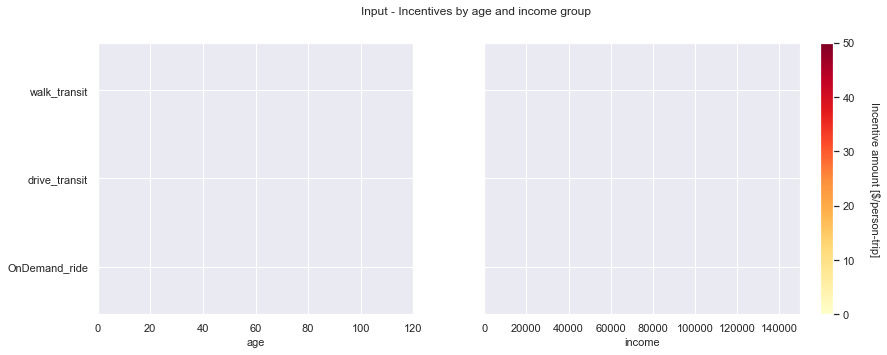

In [8]:
_ = viz.plot_incentives_inputs(incentives_data, max_incentive, max_age, max_income)

### FleetMix

Importing the `FleetMix.csv ` input file

In [9]:
fleet_mix_data =  output_folder / COMPETITION / SUBMISSION_INPUTS / "VehicleFleetMix.csv"


Processing and reorganizing the data in an input dataframe to be ready for plotting

In [202]:
bus_plotting_data = viz.process_bus_data(fleet_mix_data, route_ids, buses_list, agency_ids)

Plotting the vehicle fleet mix inputs. For the BAU, all bus lines are operating with `BUS-DEFAULT` buses. 

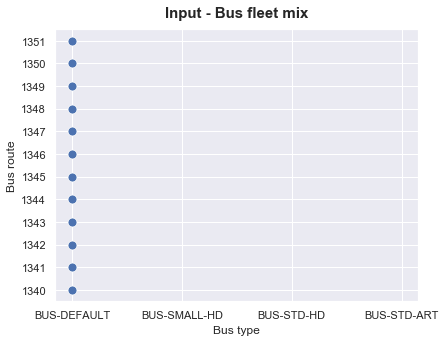

In [207]:
_ = viz.plot_vehicle_fleet_mix_inputs(fleet_mix_data, route_ids, buses_list, agency_ids)

### Fares

Importing the `MassTransitFares.csv` input file

In [93]:
fares_data = output_folder / COMPETITION / SUBMISSION_INPUTS / "MassTransitFares.csv"


Processing and reorganizing the data in an input dataframe to be ready for plotting

In [77]:
fares_plotting_data = viz.process_fares_data(fares_data,input_fares_bau_15k, max_fare, route_ids)


Plotting the Mass Transit Fares inputs. For the BAU, the Sioux Faux bus fare policy works as follow: 
* Children 5 yrs. and under\: FREE
* Children 6 to 10 yrs.\: \$0.75
* Children 11 to 18 yrs and Adults 65 yrs. and under: \$1.50
* Persons over 65 yrs\: FREE

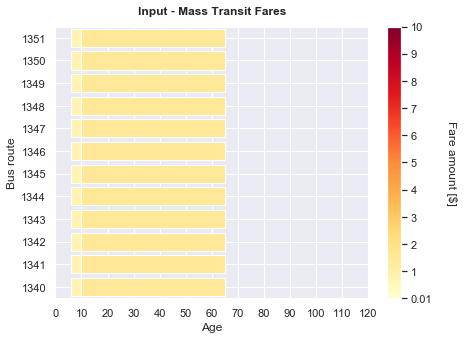

In [78]:
viz.plot_mass_transit_fares_inputs(fares_data, input_fares_bau_15k, max_fare, route_ids)

### Bus frequency

Importing the `FrequencyAdjustment.csv` input file.

In [22]:
bus_frequencies_data = output_folder / COMPETITION / SUBMISSION_INPUTS / "FrequencyAdjustment.csv"


Note that the `FrequencyAdjustement.csv` input file of the BAU is empty as the BAU bus schedule is a non-frequency based schedule. There was not any function implemented to plot the frequencies.txt file of hte BAU bus schedule.
<br> Thus, this section 2.4 will be useful to plot the `FrequencyAdjustement.csv` input file of new runs (with different inputs than the BAU) only.

In [23]:
pd.read_csv(input_bus_frequencies_bau_15k)

,trip_id,start_time,end_time,headway_secs,exact_times


Processing and reorganizing the data in an input dataframe to be ready for plotting

In [17]:
frequencies = viz.process_frequency_data(bus_frequencies_data, route_ids)

Plotting the Mass Transit Fares inputs.

In [ ]:
_ = viz.plot_bus_frequency(bus_frequencies_data, route_ids)

## Scores

Importing the `submissionScores.csv` file

In [9]:
scores_data_path = output_folder / "competition/submissionScores.csv"


### Raw scores 

Plotting the raw scores

## Mode choice

### Overall mode choice

Importing the `modeChoice.csv` output file.

In [74]:
mode_choice_data = output_folder / "modeChoice.csv"

Processing and reorganizing the data in an input dataframe to be ready for plotting

In [49]:
mode_choice = viz.process_mode_choice(mode_choice_data)

Plotting the Overall Mode Choice output.

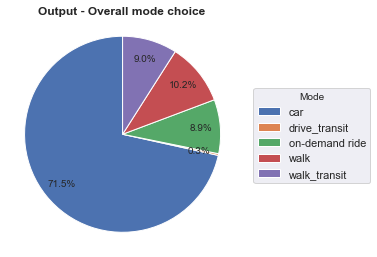

In [50]:
viz.plot_mode_choice(mode_choice_data)

### Mode Choice by hour of the day

Importing the `{ITER_NUMBER}.modeChoice.csv`output file. <br> (For the BAU, ITER_NUMBER = 100)

In [75]:
mode_choice_data = output_folder / ITERS / ITER_FOLDER / f"{ITER_NUMBER}.modeChoice.csv"


Processing and reorganizing the data in an input dataframe to be ready for plotting.

In [76]:
mode_choice = viz.process_mode_choice_by_hour(mode_choice_data)

Plotting the Mode Choice by hour of the day output.

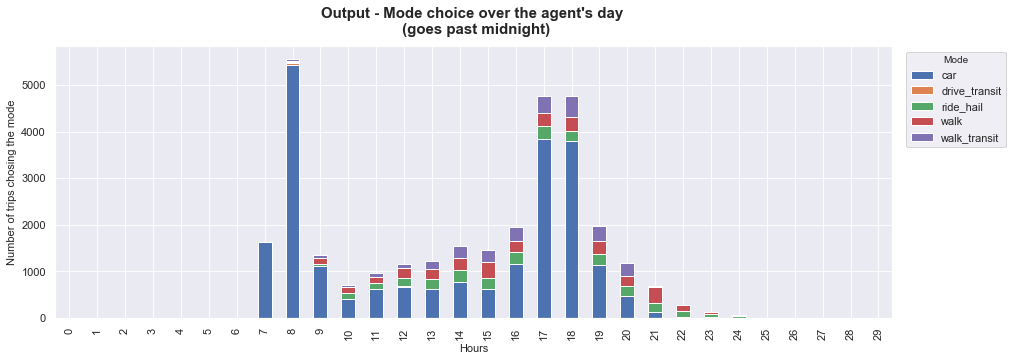

In [77]:
_ = viz.plot_mode_choice_by_hour(mode_choice_data)

### Mode Choice per income group

Plotting the Mode choice per income group output.

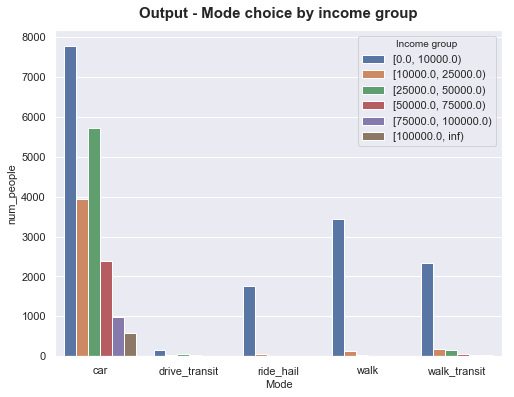

In [6]:
_ = viz.plot_mode_choice_by_income_group(person_df, trips_df)

### Mode Choice per age group

Plotting the Mode choice per age group output.

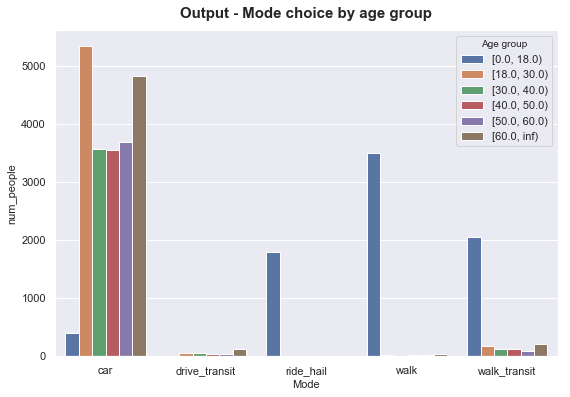

In [11]:
_ = viz.plot_mode_choice_by_age_group(person_df, trips_df)

## Accessibility

### Work-based trips

In [196]:
sample_name = ""
_ = viz.plot_accessibility(sample_name, network_file, bau_linkstats_file, population_file, utm_zone, poi_types, time_ranges, max_time, morning_peak, evening_peak)


[autoreload of visualization failed: Traceback (most recent call last):
  File "/anaconda3/lib/python3.7/site-packages/IPython/extensions/autoreload.py", line 245, in check
    superreload(m, reload, self.old_objects)
  File "/anaconda3/lib/python3.7/site-packages/IPython/extensions/autoreload.py", line 368, in superreload
    module = reload(module)
  File "/anaconda3/lib/python3.7/imp.py", line 315, in reload
    return importlib.reload(module)
  File "/anaconda3/lib/python3.7/importlib/__init__.py", line 169, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 630, in _exec
  File "<frozen importlib._bootstrap_external>", line 728, in exec_module
  File "<frozen importlib._bootstrap>", line 219, in _call_with_frames_removed
  File "/Users/vgolfi/Documents/GitHub/Uber-Prize-Starter-Kit/utilities/visualization.py", line 5, in <module>
    import pandana as pdna
ModuleNotFoundError: No module named 'pandana'
]


AttributeError: module 'visualization' has no attribute 'plot_accessibility'

### Other trips

## Level of service

### Travel expenditure

Plotting the travel expenditure output.

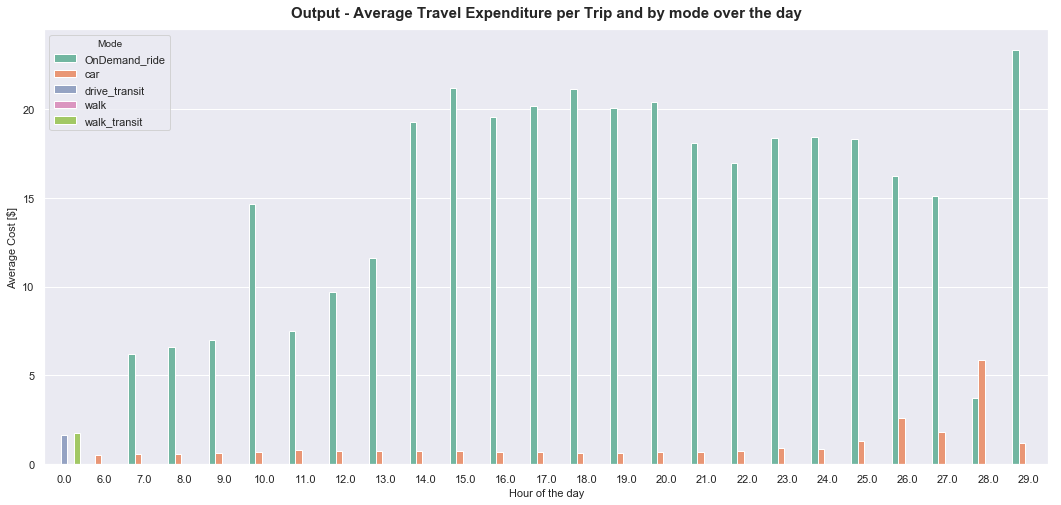

In [37]:
_ = viz.plot_average_travel_expenditure_per_trip_per_mode_over_day(legs_df)

### Bus crowding

Plotting the `Average Hours of Bus Crowding` output.

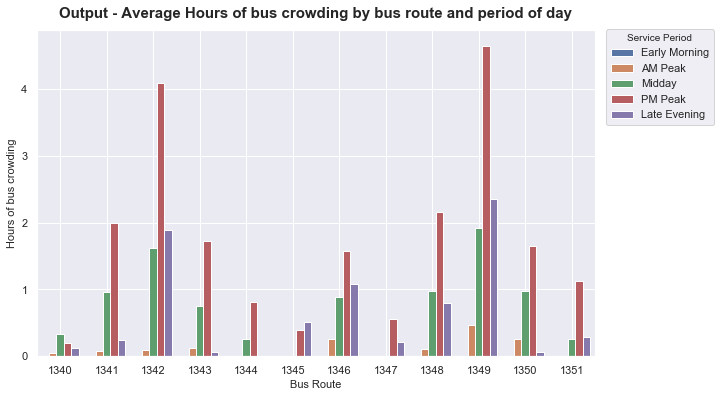

In [22]:
_ = viz.plot_average_bus_crowding_by_bus_route_by_period_of_day(paths_df, trip_to_route, seating_capacities)

## Congestion

### Average travel time by mode

Importing the `averageTravelTimes.csv` output file.

In [38]:
travel_time_data = output_folder / ITERS / ITER_FOLDER / f"{ITER_NUMBER}.averageTravelTimes.csv"

Processing and reorganizing the data in an input dataframe to be ready for plotting.

In [39]:
travel_time = viz.process_travel_time(travel_time_data)

Plotting the `Average travel time by mode` output.

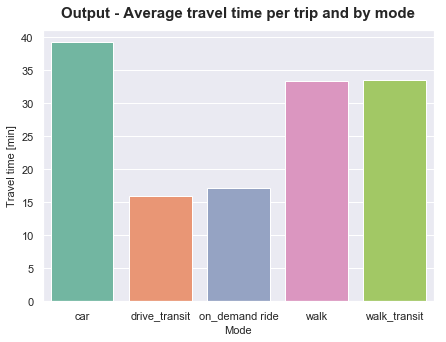

In [41]:
_ = viz.plot_travel_time_by_mode(travel_time_data)

### Travel time by mode over the day

Processing and reorganizing the data in an input dataframe to be ready for plotting.

In [54]:
travel_time_over_the_day = viz.process_travel_time_over_the_day(travel_time_data)

Plotting the `Travel time by mode over the day` output.

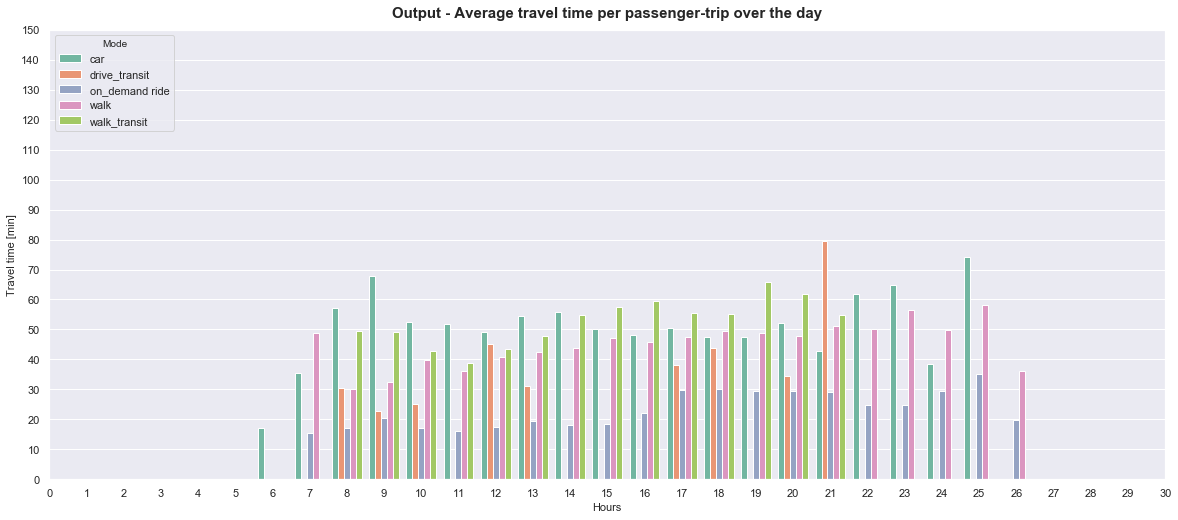

In [60]:
_ = viz.plot_travel_time_over_the_day(travel_time_data)

## Costs and Benefits of Mass Transit Level of Service Intervention

Plotting the `Costs and Benefits by route` output.

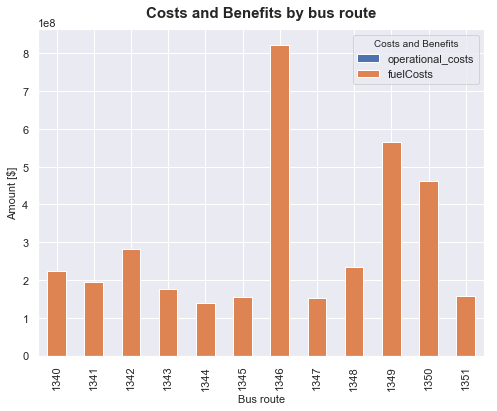

In [67]:
_ = viz.plot_cost_benefits(path_df, operational_costs, trip_to_route)

## Sustainability